In [2]:
from DataLink import DataLink
from PathLoader import PathLoader
import os 

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

# Import dynamic simulations
path_loader = PathLoader('data_config.env', 'current_user.env')
TheLink = DataLink(path_loader, 'data_codes.csv')

Project path set to: c:\Github\ode-biomarker-project


In [13]:
# import make regression to generate datasets from scikit-learn

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=2, noise=1, random_state=42)

# normalise X 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_X = scaler.fit_transform(X)


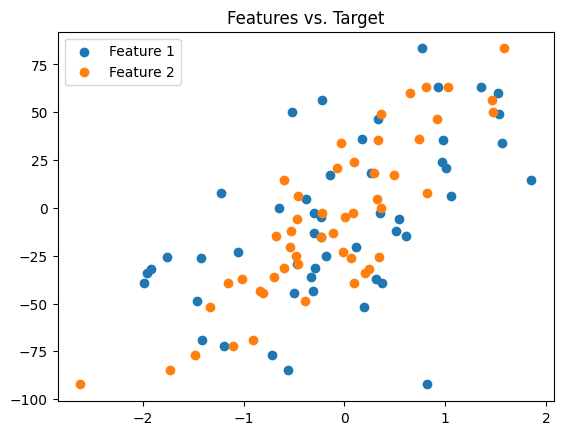

In [12]:
import matplotlib.pyplot as plt

# plot every feature against the target, on the same plot 
for i in range(X.shape[1]):
    plt.scatter(X[:,i], y)
plt.legend([f'Feature {i+1}' for i in range(X.shape[1])])
plt.title(f'Features vs. Target')
plt.show()

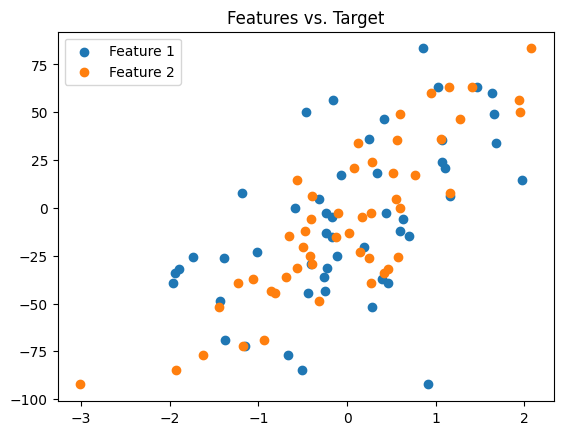

In [14]:
# plot every feature against the target, on the same plot
for i in range(norm_X.shape[1]):
    plt.scatter(norm_X[:, i], y)
plt.legend([f'Feature {i+1}' for i in range(X.shape[1])])
plt.title(f'Features vs. Target')
plt.show()

In [16]:
# calculate the correlation between the features and the target

from scipy.stats import pearsonr

for i in range(norm_X.shape[1]):
    corr, _ = pearsonr(norm_X[:,i], y)
    print(f'Feature {i+1} correlation: {corr:.3f}')


Feature 1 correlation: 0.550
Feature 2 correlation: 0.857


In [17]:
# calculate the euclidean distance between the features and the target

from scipy.spatial.distance import euclidean

for i in range(norm_X.shape[1]):
    dist = euclidean(norm_X[:,i], y)
    print(f'Feature {i+1} distance: {dist:.3f}')

Feature 1 distance: 293.999
Feature 2 distance: 291.828


In [18]:
# calculate the euclidean distance between the features themselves

for i in range(norm_X.shape[1]):
    for j in range(norm_X.shape[1]):
        dist = euclidean(norm_X[:,i], norm_X[:,j])
        print(f'Feature {i+1} and {j+1} distance: {dist:.3f}')

Feature 1 and 1 distance: 0.000
Feature 1 and 2 distance: 9.792
Feature 2 and 1 distance: 9.792
Feature 2 and 2 distance: 0.000
